In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
import pandas 
import numpy as np 
import seaborn as sns
#from ete3 import Tree
sns.set(style='darkgrid')

In [18]:
df = pandas.read_excel('data_set.xlsx', sheetname=1)
df.to_csv('data_set.csv',index=False)
df.head()

,value,mutant_name_index,kinetic_constant,rel_or_abs,scaffold
0,0.000000,0,kcat,rel,Q59976_4
1,0.000000,0,km,rel,Q59976_4
2,0.000000,0,kcatkm,rel,Q59976_4
3,0.286449,1,kcat,rel,Q59976_4
4,-2.528274,1,km,rel,Q59976_4


In [4]:
df_rel = df[df.rel_or_abs == 'rel'].copy()
df_rel.columns = [ 'value', 'mni', 'kk', 'ra', 'scaffold' ]
df_rel.shape

(132, 5)

### Brief description of the data set 

Wow, this is very cool. We have a data set consisting of 264 turnover rates, Michaelis constants, and enzyme efficiecies that are quantitatively comperable to each other (measured under standardized conditions). Of the 264, 88 are kcat, 88 are km, and 88 are kcat/KM. All express and purify as soluble protein in E. coli. Each of the 88 sequences belongs two one of four homology clusters (centered around the sequence for which the Uniprot ID is given, labeled ("WT"), which each cluster having 11 sequences. 

In [5]:
uniprots = [n.split('_')[0] for n in df.scaffold.unique()]
uniprots

['Q59976', 'Q97AX4', 'Q7MG41', 'P22505']

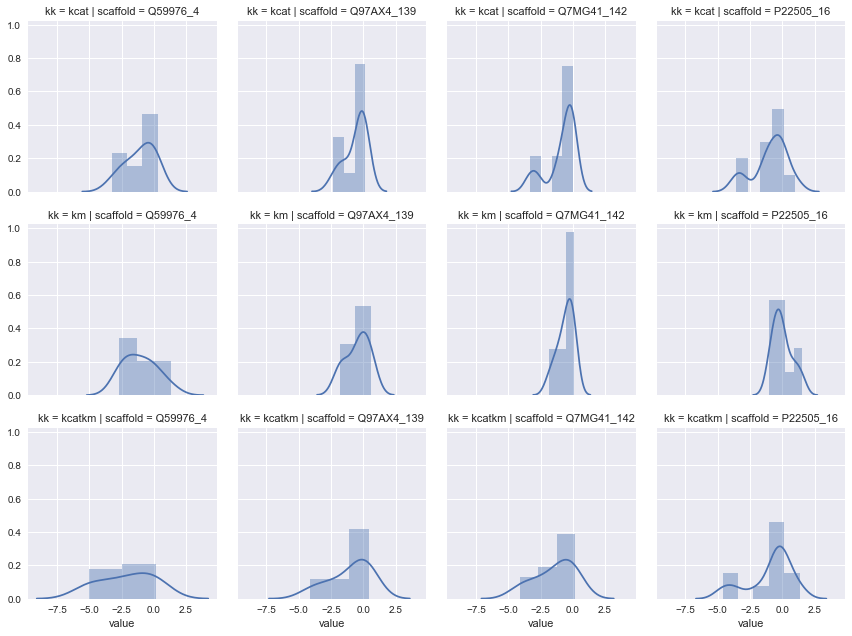

In [6]:
g = sns.FacetGrid(df_rel, col="scaffold",  row="kk")
g = g.map(sns.distplot, "value")

**Figure 1. Distributions of each of kinetic constants $k_{\textrm{cat}}$, $K_M$, and $k_{\textrm{cat}}/K_M$, for each of four scaffolds given by their Uniprot ID numbers.** Remarkably, the distributions of values are remarkably similar. Each mutant in the set was chosen to be homologous to a mutant in another set, showing that the effect of the mutations is broadly transferrable across this enzyme family. A similar trend is observed for each of $k_{\textrm{cat}}$, $K_M$, and $k_{\textrm{cat}}/K_M$. For $k_{\textrm{cat}}$, each of the distributions for the 4 different enzyme families is similar, peaked at 0 with a skewed distributation such that the left tail (lower enzyme activity) is fatter, consistent with the hypothesis that most mutations are netural or detrimential, and only a small fraction are beneficial. For $K_M$, the distributions are more centered, with mutations having a roughly equal chance of increasing or decreasing $K_M$. For $k_{\textrm{cat}}/K_M$

### Considering how we might look at this data, considering the separate parameters first 

Kind of a one-body thing, consider each of kcat, km, and kcatkm independently. 




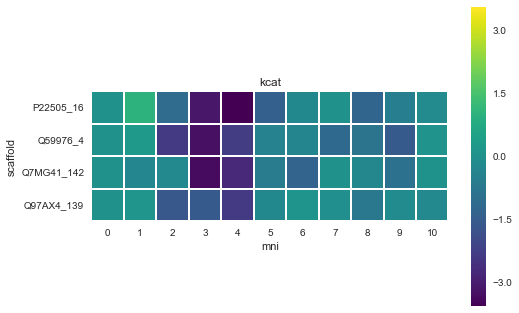

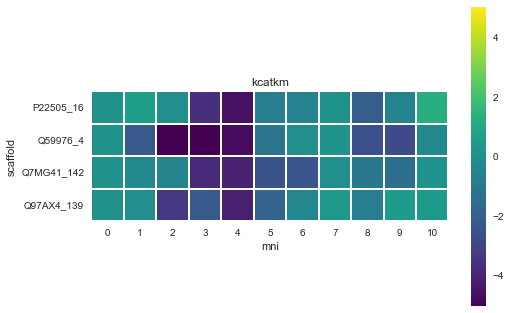

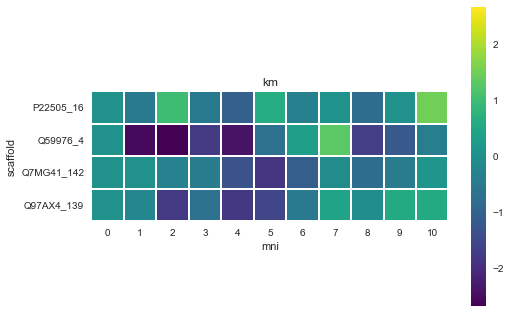

In [7]:
for kk, kkdf in df_rel.groupby('kk'):

    g = kkdf.pivot(index='mni', columns='scaffold', values='value')
    sns.heatmap(g.T,cmap='viridis', square=True, linewidths=1)

    plt.title(kk)
    plt.show()

**Figure 2. For each of $k_{\textrm{cat}}$, $K_M$, and $k_{\textrm{cat}}/K_M$, heat map showing the fitness as a function of the homolog and the mutant.** The std deviation of the column gives us a sense of, across the homolog, for this position, how similar was the effect. 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


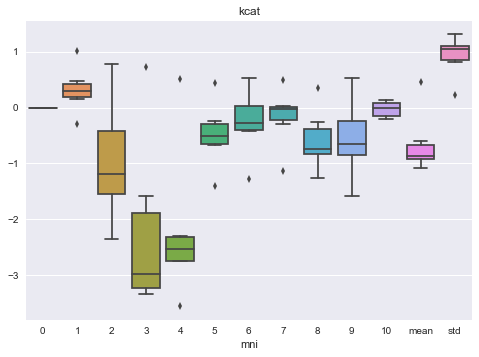

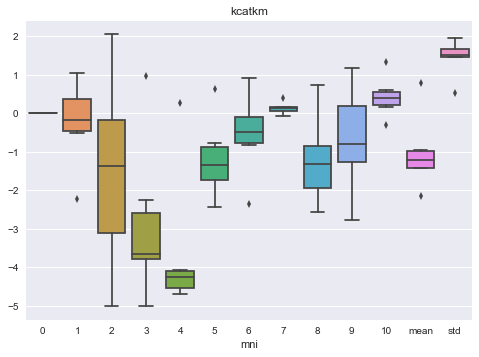

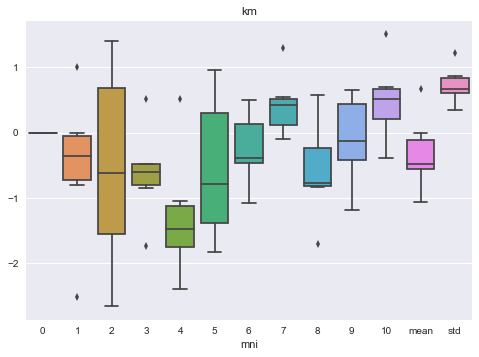

In [8]:
for kk, kkdf in df_rel.groupby( 'kk' ):
    g = kkdf.pivot(index='mni', columns='scaffold', values='value')
    
    g['mean'] = g.mean(axis=1)
    g['std'] = g.std(axis=1)
    g.loc['mean'] = g.mean(axis=0)
    g.loc['std'] = g.std(axis=0)
    
    sns.boxplot(g.T)
    plt.title(kk)
    plt.show()
    
#     print(g)

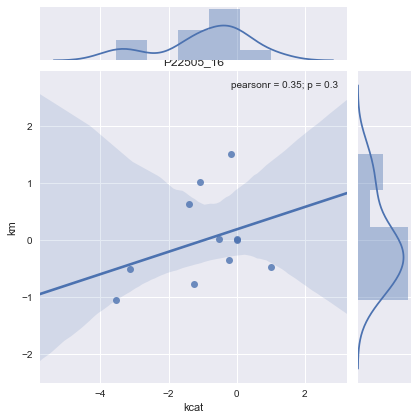

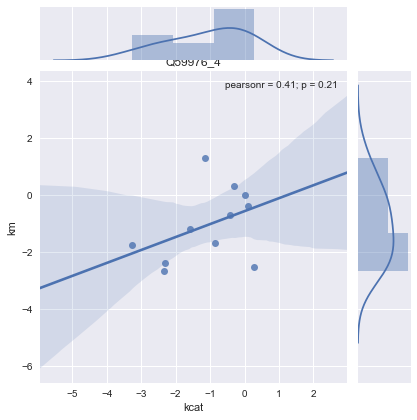

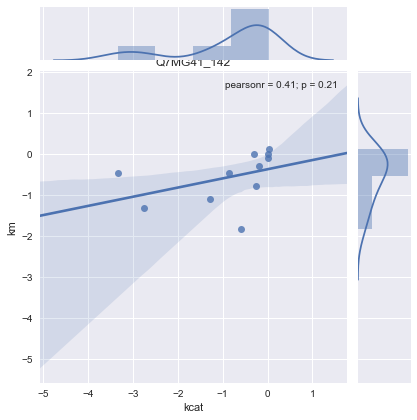

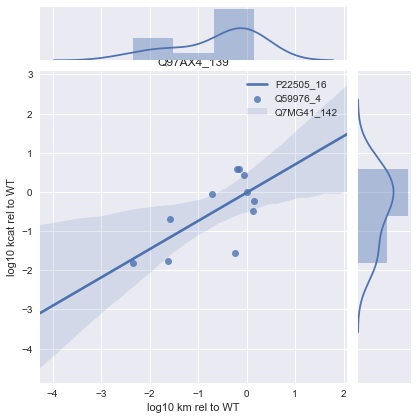

In [9]:
scaffolds = []
for uni, unidf in df_rel.groupby( 'scaffold' ):
    scaffolds.append(uni)
    dd = pandas.DataFrame(np.array([unidf[unidf.kk=='kcat'].value,unidf[unidf.kk=='km'].value]).T,columns=['kcat','km'])
    sns.jointplot('kcat','km',dd, kind='regplot')
    plt.title(uni)
plt.legend(scaffolds)
plt.xlabel('log10 km rel to WT')
plt.ylabel('log10 kcat rel to WT')

In [10]:
from matplotlib import gridspec


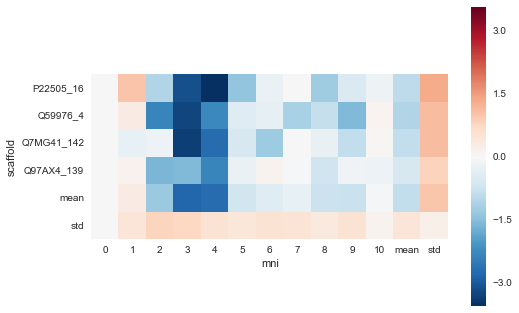

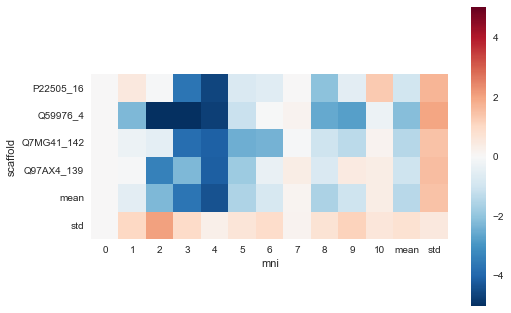

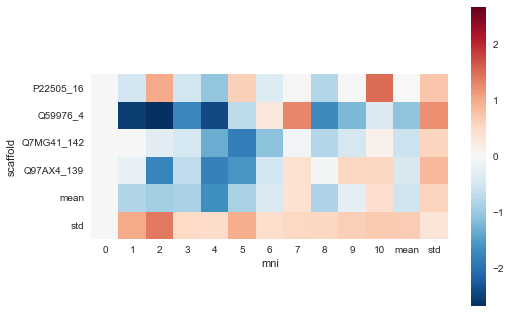

In [14]:
for kk, kkdf in df_rel.groupby('kk'):
    g = kkdf.pivot(index='mni', columns='scaffold', values='value')
    
    g['mean'] = g.mean(axis=1)
    g['std'] = g.std(axis=1)
    g.loc['mean'] = g.mean(axis=0)
    g.loc['std'] = g.std(axis=0)

    sns.heatmap(g.T, square=True)
    plt.show()
    
#     y = g.std(axis=1)
#     x = range(11)
    



In [ ]:
fig, ax = plt.subplots(3, 1)
sns.boxplot(g.T, ax=ax[0])
sns.heatmap(g.T, ax=ax[1], cbar_ax=ax[2])

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

# Generate a random dataset with strong simple effects and an interaction
n = 80
rs = np.random.RandomState(11)
x1 = rs.randn(n)
x2 = x1 / 5 + rs.randn(n)
b0, b1, b2, b3 = .5, .25, -1, 2
y = b0  + b1 * x1 + b2 * x2 + b3 * x1 * x2 + rs.randn(n)
df = pd.DataFrame(np.c_[x1, x2, y], columns=["x1", "x2", "y"])
df
# Show a scatterplot of the predictors with the estimated model surface
# sns.interactplot("x1", "x2", "y", df)

In [ ]:
sns.distplot(df_rel.value)

In [ ]:
uniprots